# `nltk.FreqDist`: A class for frequency distributions

Learning goals:

- Understand how a well-defined data structure (data + methods) makes live easier
- Know the typical functionalities of frequency distributions
- Know how powerful abstractions (addition of frequency distributions) emerge naturally
- Understand how a hierarchy of classes helps to add functionality on top of each other


## Create a distribution object

Calling the constructor function `nltk.FreqDist()`.


In [1]:
import nltk

In [2]:
fdist = nltk.FreqDist("abrakadabr")
print(type(fdist))
fdist

<class 'nltk.probability.FreqDist'>


FreqDist({'a': 4, 'b': 2, 'r': 2, 'k': 1, 'd': 1})

## Add elements

incrementing


In [ ]:
fdist["a"] += 1
fdist

FreqDist({'a': 5, 'b': 2, 'r': 2, 'k': 1, 'd': 1})

## How many elements are there in total?

The method `N()`:


In [4]:
fdist.N()

11

What is the _absolute frequency_ of an element?


In [ ]:
fdist["r"]

2

What is the _relative frequency_ of an element?


In [ ]:
fdist.freq("r")

0.18181818181818182

Which element(s) occurs most frequently?


In [7]:
fdist.max()

'a'

## Tabulate the frequencies in textual form


In [8]:
fdist.tabulate()

a b r k d 
5 2 2 1 1 


#### Only the most frequent 4 elements.


In [9]:
fdist.tabulate(4)

a b r k 
5 2 2 1 


## Line plot of all or n first elements

Cumulative ...


<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

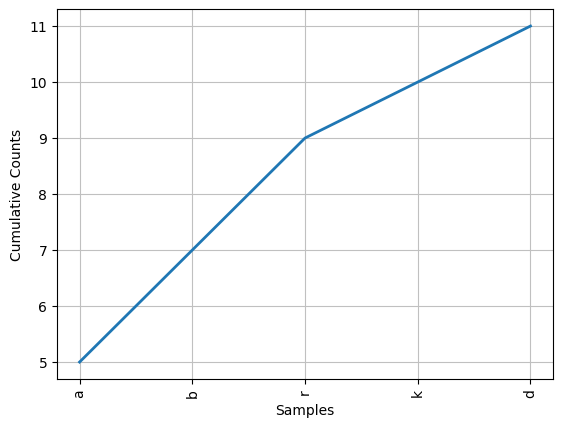

In [10]:
%matplotlib inline
fdist.plot(cumulative=True)

Is this the best plot style for frequency distributions?


Probably not: https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html


<BarContainer object of 5 artists>

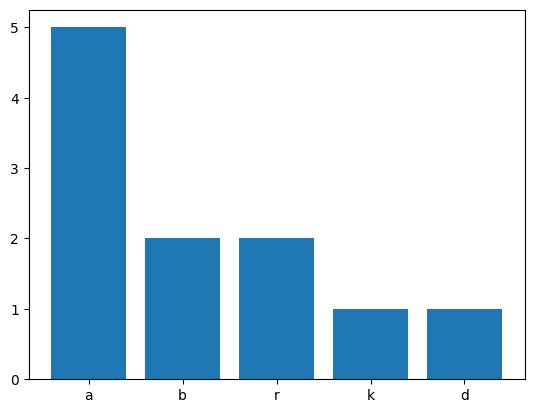

In [ ]:
import matplotlib.pyplot as plt

plt.bar(fdist.keys(), fdist.values())

## Iterate through all elements


In [12]:
for item in fdist:
    print(item, fdist[item])

a 5
b 2
r 2
k 1
d 1


Sorted by frequency in descending order


In [ ]:
for item, freq in fdist.most_common():
    print(item, freq)

a 5
b 2
r 2
k 1
d 1


In [14]:
for item in sorted(fdist, key=fdist.get, reverse=True):
    print(item, fdist[item])

a 5
b 2
r 2
k 1
d 1


## Adding distributions


In [ ]:
fdist2 = nltk.FreqDist("Hokuspokus")
fdist + fdist2

FreqDist({'a': 5, 'k': 3, 'b': 2, 'r': 2, 'o': 2, 'u': 2, 's': 2, 'd': 1, 'H': 1, 'p': 1})

FreqDist builds on the Python library class `collections.Counter`

Normally the functionality of this standard class is good enough for frequency distribution computations.


In [16]:
help(nltk.FreqDist)

Help on class FreqDist in module nltk.probability:

class FreqDist(collections.Counter)
 |  FreqDist(samples=None)
 |  
 |  A frequency distribution for the outcomes of an experiment.  A
 |  frequency distribution records the number of times each outcome of
 |  an experiment has occurred.  For example, a frequency distribution
 |  could be used to record the frequency of each word type in a
 |  document.  Formally, a frequency distribution can be defined as a
 |  function mapping from each sample to the number of times that
 |  sample occurred as an outcome.
 |  
 |  Frequency distributions are generally constructed by running a
 |  number of experiments, and incrementing the count for a sample
 |  every time it is an outcome of an experiment.  For example, the
 |  following code will produce a frequency distribution that encodes
 |  how often each word occurs in a text:
 |  
 |      >>> from nltk.tokenize import word_tokenize
 |      >>> from nltk.probability import FreqDist
 |      >

Counter in turn is based on dictionaries


In [ ]:
import collections

help(collections.Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                

In [18]:
counter = collections.Counter("hokuspokus")

In [19]:
# The string representation even reminds us of dictionaries...
counter

Counter({'o': 2, 'k': 2, 'u': 2, 's': 2, 'h': 1, 'p': 1})